# **ch.07 딥러닝을 시작합니다**  
## 07-3 신경망 모델 훈련  
### 풀어야 할 문제:  
> ### loss curve, dropout, callback에 대해 알아보라
### *손실 곡선*
`fit()` method는 `History` class object를 return  
`History` class object는 training 과정에서 계산한 indicator, 즉 loss와 accuracy value를 저장함


이 loss와 accuracy로 graph 그리기
+ data 준비하기

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input/255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

+ model 만들기
  + model을 만드는 function 정의

In [ ]:
def model_fn(a_layer=None):
  model = keras.Sequential()

  model.add(keras.layers.Flatten(input_shape=(28, 28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))

  return model

In [ ]:
model = model_fn()

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


if문을 제외하고는 이전에 model을 만들던 방식과 동일  
if문은 `model_fn()` function에 `a_layer` parameter로 layer를 추가하면 hidden layer뒤에 또 하나의 layer를 추가하는 역할 수행


+ train model  
`fit()` method의 return을 `history` variable에 담기















In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

`verbose` parameter를 `0`으로 지정하여 train 과정을 나타내지 않게 함  


`history`에는 `History` class object가 담겨있고, 이 `history` object에는 `history` dictionary가 담겨있음


dictionary 내용 확인





In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


`history` dictionary에는 epoch당 loss와 accuracy가 담겨있음  
이 value는 epoch마다 계산한 value를 순서대로 나열한 list  


이 value를 사용하여 matplotlib로 graph 그리기

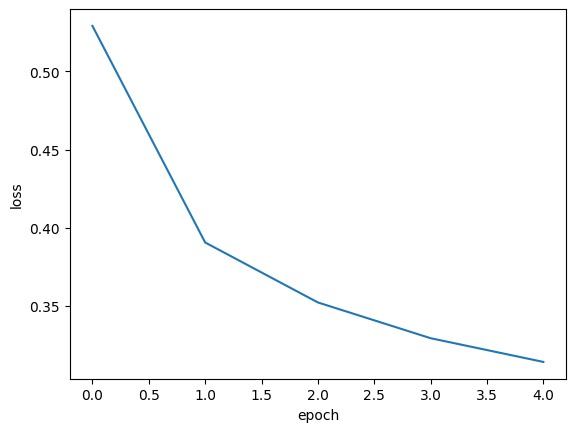

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

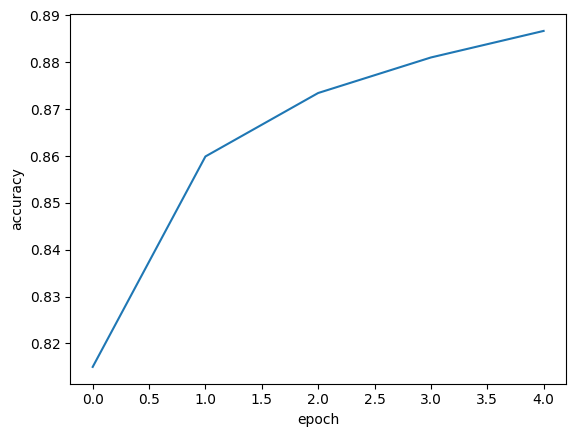

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

확실히 epoch마다 loss가 감소하고 accuracy가 향상되고 있음


### *검증 손실*  
epoch마다 loss가 감소하고 있으므로, epoch를 늘려 train하면 더 좋은 performance를 보여주지 않을까?  


stochastic gradient descent에 대해 알아볼 때, epoch 수와 overfitting과 underfitting의 관계에 대해 살펴봄  
neural network는 모두 일종의 gradient descent를 사용하므로 동일한 관계가 neural network에도 적용됨


epoch에 따른 overfitting과 underfitting을 살펴보려면 train set 뿐 아니라 validation set에서의 score도 확인해야 함


epoch에 따른 validation loss를 계산하기 위해 keras model의 `fit()` method에 validation data를 전달할 수 있음  
`validation_data` parameter에 validation input과 target을 tuple로 전달


validation loss도 포함하여 다시 train model

In [ ]:
model = model_fn()

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

`history` dictionary의 key 확인

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


overfitting, underfitting 조사를 위해 graph 그리기

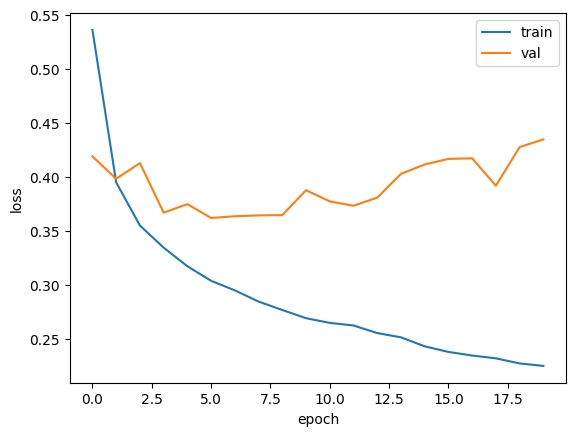

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

validation loss가 감소하다가 다섯 번째 epoch부터 다시 상승하기 시작  
train loss는 꾸준히 감소하기 때문에 overfitting 발생


validation loss가 상승하는 시점을 늦추면 validation set에 대한 loss가 줄어들고, accuracy도 향상될 것


overfitting을 억제하기 위해 optimizer hyperparameter tuning  
RMSprop은 많은 문제에서 잘 작동하지만, 다른 optimizer를 사용하고자 한다면 Adam이 좋을 것


Adam을 사용하여 model을 train하고 다시 graph 그리기

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5236 - accuracy: 0.8172 - val_loss: 0.4578 - val_accuracy: 0.8362
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3925 - accuracy: 0.8595 - val_loss: 0.3731 - val_accuracy: 0.8652
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3516 - accuracy: 0.8736 - val_loss: 0.3683 - val_accuracy: 0.8660
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3304 - accuracy: 0.8802 - val_loss: 0.3498 - val_accuracy: 0.8753
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3105 - accuracy: 0.8858 - val_loss: 0.3358 - val_accuracy: 0.8798
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2971 - accuracy: 0.8903 - val_loss: 0.3373 - val_accuracy: 0.8780
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2821 - accuracy: 0.8959 - val_loss: 0.3346 - val_accuracy:

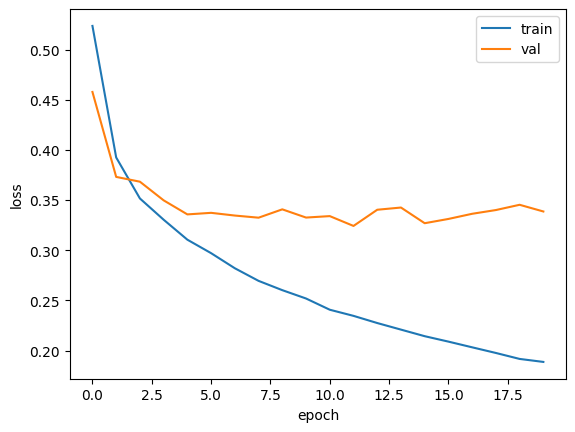

In [ ]:
model = model_fn()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

overfitting이 완화됨  
&rarr; Adam optimizer가 data에 잘 맞음


더 나은 loss curve를 얻으려면 learning rate를 tuning해서 시도해 볼 수 있음


### *드롭아웃*  
neural network에서 사용하는 대표적인 규제 방법에는 dropout이 있음  
dropout은 training 과정에서 layer의 neuron 일부를 random하게 골라 해당 neuron의 출력을 0으로 만들어 overfitting을 억제  
drop할 neuron의 비율은 hyperparameter


dropout을 사용하면 일부 neuron에 과대하게 의존하는 것을 방지하고 모든 입력에 대해 집중할 수 있도록 하는 효과가 있음  
일부 neuron의 출력이 없을 수 있다는 것을 감안하면 neural network는 더 안정적인 prediction을 만들 것


dropout에 대한 또 다른 해석은 ensemble  
dropout이 적용되면 random하게 neuron을 drop한 여러 neural network가 생성되는데, 이는 마치 여러 개의 neural network를 ensemble하는 것으로 생각할 수 있음  
ensemble은 overfitting을 억제하기에 좋은 기법


keras는 `keras.layers` package 아래 `Dropout` class로 dropout을 제공  
dropout이 layer처럼 사용되기는 하지만, train되는 model parameter는 없음


dropout을 적용한 model을 만들고 summary 확인

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dropout layer의 input과 output의 크기가 같음  
일부 neuron의 output을 0으로 만들지만, 전체 output array의 size를 바꾸지는 않음


training이 끝난 뒤에 test나 prediction을 수행할 때는 dropout을 적용하지 않아야 함  
trained neuron 모두를 사용해야 올바른 predict를 수행할 수 있을 것  
tensorflow와 keras는 test나 predict를 수행할 때 자동으로 dropout layer를 적용하지 않음


model을 train하고 loss curve 그리기





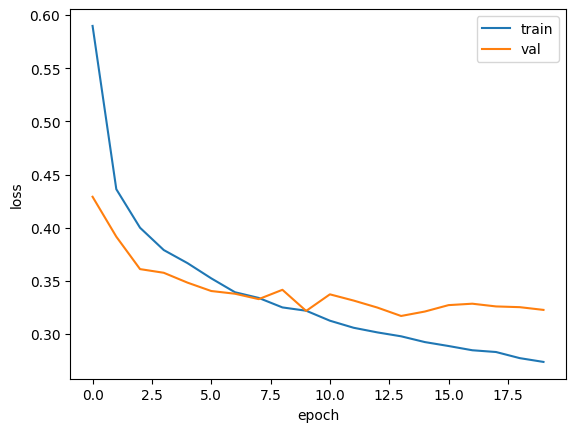

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

확실히 overfitting이 억제됨  
이 model은 20번의 epoch를 train했기 때문에 결국 overfitting이 발생함  
overfitting이 발생하지 않는 10번의 epoch로 다시 model을 train해야 할 것


### *모델 저장과 복원*  
epoch 횟수를 10으로 지정하여 train model

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

keras model은 trained model parameter를 저장하는 `save_weights()` method를 제공  
`save_weights()` method는 기본적으로 tensorflow의 checkpoint format으로 저장하지만, 확장자가 '.h5'일 경우 HDF5 format으로 저장


`save_weights()` method로 model parameter 저장

In [ ]:
model.save_weights('model-weights.h5')

keras model은 model structure와 model parameter를 함께 저장하는 `save()` method도 제공  
`save()` method는 tensorflow의 SavedModel format으로 저장하지만, 확장자가 '.h5'일 경우 HDF5 format으로 저장


`save()` method로 model 저장

In [ ]:
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


두 file이 잘 만들어졌는지 확인

In [ ]:
!ls -la *.h5

-rw-r--r-- 1 root root 981176 Sep 16 05:37 best-model.h5
-rw-r--r-- 1 root root 333320 Sep 16 05:51 model-weights.h5
-rw-r--r-- 1 root root 981176 Sep 16 05:51 model-whole.h5


train하지 않은 새로운 model을 만들고 model-weights.h5 file에서 trained model parameter를 불러와 사용해보기
+ model 만들기









In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

+ model parameter 불러오기  
(`load_weights()` method 사용)

In [ ]:
model.load_weights('model-weights.h5')

`load_weights()` method를 사용하기 위해서는 이 method를 사용하는 model이 `save_weights()` method로 저장한 model과 같은 structure를 가져야 함


+ model의 validation accuracy 확인해보기  
`predict()` method는 scikit-learn과 달리 sample마다 10개의 class에 대한 probability를 return  
&rarr; Fashion MNIST에서 덜어낸 validation set은 12,000개의 sample이므로 `predict()` method는 (12000, 10) size의 array를 return  
&rarr; 각 sample마다 10개의 probability 중 가장 큰 value의 index를 골라 target label과 비교하여 accuracy 계산


`evaluate()` method를 사용하는 방법도 있지만, `evaluate()` method는 loss를 계산하기 위해 반드시 사전에 `compile()` method를 실행해야 함  
&rarr; 여기에서는 새로운 data에 대해 accuracy만 계산하면 되는 상황이라고 가정하고 practice

In [ ]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)

print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8815


model의 `predict()` method의 return에서 가장 큰 value를 고르기 위해 array에서 가장 큰 value의 index를 return하는 numpy의 `argmax()` function 사용  
`argmax()` function의 `axis` parameter를 `-1`로 지정하여 array의 마지막 dimension을 따라 maximum을 골라냄  
&rarr; validation set은 2 dimension array이기에 마지막 dimension은 1  
&rarr; column을 따라 maximum을 고름


index를 고르고 나면, 이 value에 대해 validation target과 비교해 맞추었으면 1, 틀렸으면 0이 되게 하여 이를 평균함  
&rarr; accuracy


model 전체를 file에서 불러와 사용해보기
+ model 불러오기  
(`load_model()` method 사용)

In [ ]:
model = keras.models.load_model('model-whole.h5')

+ score model

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8815


[0.3238881528377533, 0.8815000057220459]

### *콜백*  
일련의 과정을 돌이켜보면, 20번의 epoch를 돌면서 train하여 validation loss가 상승하는 지점을 찾아 model이 overfitting이 되지 않는 정도의 epoch로 다시 model을 train함  
&rarr; 두 번 train함


callback은 training 과정 중간에 특정 작업을 수행할 수 있게 하는 objects로 `keras.callbacks` package 아래에 있는 classes  
`fit()` method의 `callbacks` parameter에 list로 전달하여 사용


`ModelCheckpoint` callback은 model을 저장하는 callback으로, 기본적으로는 epoch마다 model을 저장  
`save_best_only` parameter를 `True`로 지정하여 가장 낮은 validation loss를 기록한 model만 저장할 수 있음


`ModelCheckpoint` callback을 적용해 train model

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

callback으로 저장한 model을 불러와 score model

In [ ]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3135 - accuracy: 0.8878


[0.31349650025367737, 0.8878333568572998]

`ModelCheckpoint` callback이 가장 낮은 validation loss의 model을 자동으로 저장해 주었지만, 여전히 20번의 epoch 동안 train 수행  
validation loss가 상승하기 시작하면 그 이후에는 overfitting이 커지기 때문에 training을 계속할 필요가 없음  
&rarr; computer resource와 time을 아낄 수 있음


이렇게 overfitting이 시작되기 전에 training을 중지하는 것이 early stopping  
eary stopping은 epoch 수를 제한하는 역할을 수행하지만, model이 overfitting되는 것을 억제해 주기 때문에 regularization으로 볼 수도 있음


keras는 early stopping을 `EarlyStopping` class로 제공  
`EarlyStopping`의 `patience` parameter는 validaion loss가 향상되지 않더라도 계속해서 training을 진행할 epoch 횟수를 지정  
`restore_best_weights` parameter를 `True`로 지정하면 가장 낮은 validation loss를 기록한 model parameter로 되돌림  
&rarr; `ModelCheckpoint`와 `EarlyStopping` callback을 함께 사용하면 가장 낮은 validation loss의 model을 저장하고, validation loss가 다시 상승할 때 training을 중지하며 model의 parameter를 최상의 parameter로 되돌림


두 callback 함께 사용해보기

In [ ]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

`early_stopping_cb` object의 `stopped_epoch` attribute에서 몇 번 째 epoch에서 training이 중지되었는지 확인할 수 있음


`stopped_epoch` 확인

In [ ]:
print(early_stopping_cb.stopped_epoch)

8


loss curve 그리기

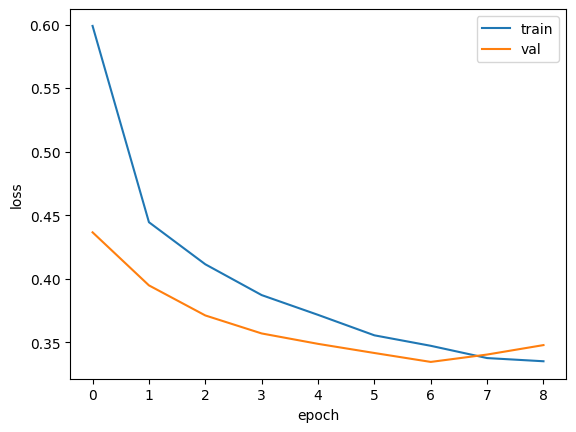

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

열 번째 epoch에서 가장 낮은 loss를 기록했고, 열 두 번째 epoch에서 training이 중지됨


이처럼 callback을 사용하면 computer resource와 time을 아낄 수 있고, 최상의 model을 알아서 저장해주므로 편리함


마지막으로 early stopping으로 얻은 model을 사용해 validation set에서의 score 확인

In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8767


[0.33471766114234924, 0.8767499923706055]